In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [72]:
rand_coordinates = [( np.random.uniform(-90,90 ), np.random.uniform(-180,180) ) for k in range(1400)]

In [73]:
cities = []
for coordinate_pair in rand_coordinates:
    lat, long = coordinate_pair
    cities.append(citipy.nearest_city(lat, long))

In [74]:
cities_list=[]
for city in cities:
    country_code = city.country_code
    name = city.city_name
    cities_list.append(name)

In [75]:
actual_cities_list=[]
for city in cities_list:
    if city not in actual_cities_list:
        actual_cities_list.append(city)

## Perform API Calls

In [82]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

query_url = f"{url}&q="

In [83]:
# set up lists to hold reponse info
city_name=[]
lat = []
temp = []
hum = []
cloud = []
windsp = []
count = 1

for city in actual_cities_list: 
    print(f'City number {count}: {city}')
    print(query_url+city)
    count+=1   

City number 1: westpunt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1cf4b7374139e1951e37d7cd31406501&q=westpunt
City number 2: margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1cf4b7374139e1951e37d7cd31406501&q=margate
City number 3: west bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1cf4b7374139e1951e37d7cd31406501&q=west bay
City number 4: rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1cf4b7374139e1951e37d7cd31406501&q=rikitea
City number 5: saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1cf4b7374139e1951e37d7cd31406501&q=saskylakh
City number 6: bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1cf4b7374139e1951e37d7cd31406501&q=bethel
City number 7: dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1cf4b7374139e1951e37d7cd31406501&q=dikson
City number 8: hasaki
http://api.openweathermap.org/data/2

In [84]:
# Loop through the list of cities and perform a request for data on each
for city in actual_cities_list:
    response = requests.get(query_url+city).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    temp.append(response['main']['temp'])
    hum.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    windsp.append(response['wind']['speed'])

In [85]:
#Create DataFrame and set variables

cities_df = pd.DataFrame({'City': city_name,
                          'Latitude': lat,
                          'Temperature': temp,
                          'Humidity': hum,
                          'Cloudiness': cloud,
                          'Wind Speed': windsp
                         })
cities_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Margate,-43.03,51.80,71,40,19.46
1,West Bay,50.71,56.07,82,20,8.05
2,Rikitea,-23.12,73.55,100,24,7.25
3,Saskylakh,71.97,60.77,84,0,4.83
4,Bethel,60.79,55.40,76,90,11.41
5,Dikson,73.51,49.16,81,36,20.38
6,Hasaki,35.73,73.44,100,90,16.11
7,Fairview,40.81,77.74,69,90,11.41
8,Port Lincoln,-34.72,57.08,92,0,15.68
9,Mobai,7.99,71.57,99,92,5.06


In [87]:
citiesdfcsv = cities_df.to_csv("WeatherPyCities.csv")

In [89]:
xaxis = cities_df["Latitude"]

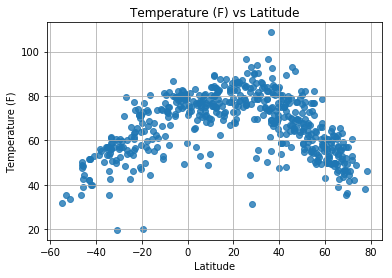

In [100]:
tempyaxis = cities_df["Temperature"]
plt.scatter(xaxis, tempyaxis, alpha=0.8)
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
tempvslatplot = plt.savefig("images/TemperaturevsLat.png")
plt.show()

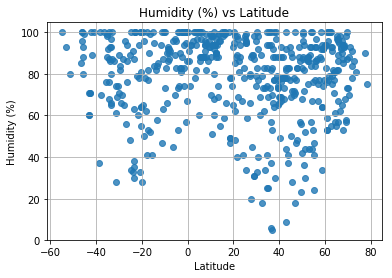

In [101]:
humaxis = cities_df["Humidity"]
plt.scatter(xaxis, humaxis, alpha=0.8)
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
tempvslatplot = plt.savefig("images/HumidityvsLat.png")
plt.show()

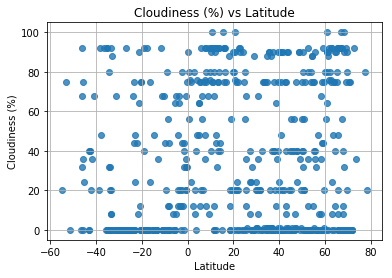

In [102]:
cloudaxis = cities_df["Cloudiness"]
plt.scatter(xaxis, cloudaxis, alpha=0.8)
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
tempvslatplot = plt.savefig("images/CloudinessvsLat.png")
plt.show()

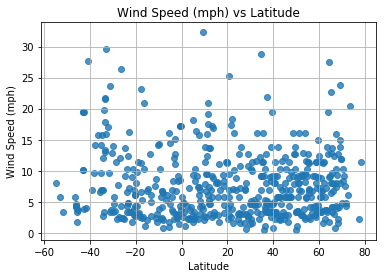

In [103]:
windaxis = cities_df["Wind Speed"]
plt.scatter(xaxis, windaxis, alpha=0.8)
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
tempvslatplot = plt.savefig("images/WindSpeedvsLat.png")
plt.show()

In [ ]:
#analysis in readme.md